# Intent Classification Prompt Analysis

## Core Structure

### Objective
Classify user questions into specific intent categories (#Sales or #Channel_Dynamics)

### Chain of Thought Implementation
1. **Information Extraction** (Step 1)
   - "Read the question to take the most relevant information"
   - Forces attention to key elements in the query

2. **Reference Analysis** (Step 2)
   - "Read the tag_description to take the most relevant information on any goals, data, and dimensions"
   - Establishes criteria for classification decision

3. **Correlation Assessment** (Step 3)
   - "Find the correlation between the tag description and the good hashtag"
   - Explicit comparison process before classification

### Learning Through Examples
- Each intent category (#Sales, #Channel_Dynamics) includes:
  - Detailed description of the domain
  - Sample questions demonstrating classification patterns
  - Data dimensions relevant to each category

## Reasoning Elements

- **Structured Deliberation**: The prompt enforces a specific order of operations
- **Cross-Reference Mechanism**: Requires explicit matching between question features and category descriptions
- **Binary Decision Framework**: Forces classification into one of two specific categories
- **No Rejection Option**: "It is not to say this is not a #Sales or #Channel_Dynamics"

## Improvement Opportunities

- **Ambiguity Handling**: No guidance for handling questions that may fit multiple categories
- **Confidence Scoring**: Could add a step to rate classification confidence
- **Explanation Requirement**: Could request justification for the classification choice
- **Edge Case Management**: No instructions for questions partially matching both categories

In [ ]:
! pip install -U langgraph langsmith
! pip install langchain_community
! pip install langchain_openai

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
from langchain_openai import ChatOpenAI  #  
# API Key
os.environ['OPENAI_API_KEY'] = "sk-proj- "

# Model
llm_classifier = ChatOpenAI(
    model="gpt-4o-mini",  #  
    temperature=0
)

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage


# Prompt
classifier_instructions = """"your  goal is to find the good intention relative to a question
the intention could be a hastag like #Sales or #Channel_Dynamics" 
 
this is the step you need to do
 
Step 1 : Read the question to take the most relevant information 
Step 2 : Read the tag_descritption to take the most relevant information on any goals , data , and dimensions 
Step 3 : according to step 1 and 2 , Find the correlation between the tag description  and the good hastag 

This is  the tag description for the #sales
 
#sales = This tag is used when a user asks questions about Sales Performance. 
Maximizing Sales is the ultimate goal of any commercial production organization so understanding Sales Performance is very important.
The data includes information on Sales in various currencies and "Trade Levels" (eg Manufacturer, Wholesaler, Public/pharmacy prices) 
and is split by dimensions such as Country, Corporation, Anatomical Therapy Clase, Disease, Product, Form, Strength, Pack.
 
and this is an example of the question link to this tag_descritption for the Intend #sales
 
1. What is the trend of our product performance over the last quarter?
2. How does our revenue compare across different countries?
3. Which anatomical therapy class is generating the most revenue?
4. What are the top-performing products in the public/pharmacy price segment?
5. How do our sales figures vary by product form and strength?
6. What is the market share of our corporation in the European region?
7. How do sales figures differ between wholesalers and manufacturers?
8. What is the average price point for our products in the US market?
9. Which disease category is driving the highest sales for our company?
10. How have our sales figures changed year-over-year in the UK?

This the tag_description for the #Channel_Dynamics 

#Channel_Dynamics  = This tag is used when a user asks questions about any kind of Spend, 
Marketing Spend, Promoter/detractors, Mentions etc. 
The data provides information on how products are marketed and percieved.
 
 
and this is an example of the question link to this tag_descritption for the Intend #Channel_Dynamics 
 
1. What is the current sentiment around my brand in social media discussions?
2. How does our marketing spend compare to industry benchmarks?
3. What are the key factors influencing customer perceptions of our products?
4. How many positive reviews have we received in the last quarter?
5. What channels are driving the most engagement for our marketing campaigns?
6. How frequently are our products mentioned in online forums?
7. What is the average customer rating for our latest product launch?
8. How do our promotional efforts impact customer loyalty?
9. What trends are emerging in consumer feedback about our brand?
10. How does our brand's visibility compare to that of our main competitors?
 

you goal is to determine if the question is a  #sales intention  or #Channel_Dynamics intention , if not say #somewhereelse 
be intelligent , think you are an expert of intentio and use carefully the 10 examples for the 2 tags

"""

# Test classifier
classifier_answer = llm_classifier.invoke(
    [SystemMessage(content=classifier_instructions)]
    + [
        HumanMessage(
            content="What are the top three competitors in my market and their marketing strategies"
        )
    ]
)

In [6]:
print(classifier_answer.content)

#Channel_Dynamics


In [ ]:
# Process each question individually
questions = [
    "What are the top three competitors in my market and their marketing strategies",
    "How can I improve my product's features to better meet customer needs",
    "What pricing strategy would maximize my profit margins",
    "What distribution channels should I consider for my product",
    "How do our sales figures compare to those of our main competitors?",
    "How does the performance of our products differ by pack size?",
    "How does the sales performance of our new products compare to established ones?",
    "How many mentions is my product getting?",
    "What are my competitors spending on marketing?"
]

classifier_answers = []
for question in questions:
    response = llm_classifier.invoke(
        [SystemMessage(content=classifier_instructions)]
        + [HumanMessage(content=question)]
    )
    classifier_answers.append(response)

# Display the answers with the complete question
for i, (question, answer) in enumerate(zip(questions, classifier_answers), 1):
    print(f"Question: {question}")
    print(f"Réponse:")
    print(answer.content)
    print("-" * 50)

Question: What are the top three competitors in my market and their marketing strategies
Réponse:
#Channel_Dynamics
--------------------------------------------------
Question: How can I improve my product's features to better meet customer needs
Réponse:
#somewhereelse
--------------------------------------------------
Question: What pricing strategy would maximize my profit margins
Réponse:
#somewhereelse
--------------------------------------------------
Question: What distribution channels should I consider for my product
Réponse:
#Channel_Dynamics
--------------------------------------------------
Question: How do our sales figures compare to those of our main competitors?
Réponse:
#sales
--------------------------------------------------
Question: How does the performance of our products differ by pack size?
Réponse:
#sales
--------------------------------------------------
Question: How does the sales performance of our new products compare to established ones?
Réponse:
#sales
-

In [29]:
from typing_extensions import TypedDict
from typing import List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, HTML

In [30]:
from typing_extensions import TypedDict
from typing import List

class GraphState(TypedDict):
    """
    Graph state is a dictionary that contains information we want to propagate to, and modify in, each graph node.
    """
    question: str  # User question
    intent: str
     

In [ ]:
def Intention_generation(state: GraphState):
    """
    Generation of examples 

    Args:
        state (dict): The current graph state

    Returns:
        dict: Updated state with question_intention
    """
    print("---Intent---")
    
    # code for calling the LLM
    question_intention = llm_classifier.invoke(
        [SystemMessage(content=classifier_instructions)]
        + [HumanMessage(content=state["question"])]
    )
    
    # "Important: return the complete updated state, not just the new value.
    return {"intent": question_intention.content}

In [33]:
# Graph definition
graph_builder = StateGraph(GraphState)
graph_builder.add_node("Intention_generation", Intention_generation)
graph_builder.add_edge(START, "Intention_generation")
graph_builder.add_edge("Intention_generation", END)
graph = graph_builder.compile()

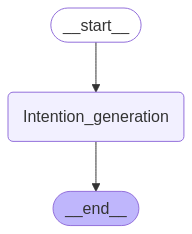

In [ ]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error : {e}")
    #  
    pass

In [ ]:
# List of questions to process
questions = [
    "What are the top three competitors in my market and their marketing strategies",
    "How can I improve my product's features to better meet customer needs",
    "What pricing strategy would maximize my profit margins",
    "What distribution channels should I consider for my product",
    "How do our sales figures compare to those of our main competitors?",
    "How does the performance of our products differ by pack size?",
    "How does the sales performance of our new products compare to established ones?",
    "How many mentions is my product getting?",
    "What are my competitors spending on marketing?"
]

# Process each question and collect the results
results = []
for question in questions:
    # Create the initial state
    inputs = {"question": question}
    
    #  Execute the graph
    output = graph.invoke(inputs)
    
    # Store the question and its corresponding intent
    results.append({"Question": question, "Intention": output["intent"]})

# Generate the HTML with embedded CSS - dark version with black lines
html_output = """
<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            background-color: #1e1e1e;
            color: #e0e0e0;
            font-family: Arial, sans-serif;
        }
        
        .intent-table {
            border-collapse: collapse;
            width: 100%;
            max-width: 1200px;
            margin: 20px auto;
            font-family: Arial, sans-serif;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.5);
            border-radius: 5px;
            overflow: hidden;
            background-color: #333;
        }
        
        .intent-table thead tr {
            background-color: #222;
            color: #e0e0e0;
            text-align: left;
            border-bottom: 2px solid #000;
        }
        
        .intent-table th,
        .intent-table td {
            padding: 12px 15px;
            border-bottom: 1px solid #000;
        }
        
        .intent-table tbody tr {
            background-color: #333;
        }
        
        .intent-table tbody tr:nth-of-type(even) {
            background-color: #2a2a2a;
        }
        
        .intent-table tbody tr:last-of-type {
            border-bottom: 2px solid #000;
        }
        
        .intent-table tbody tr:hover {
            background-color: #444;
        }
        
        .question-cell {
            width: 40%;
            vertical-align: top;
        }
        
        .intent-cell {
            width: 60%;
            vertical-align: top;
        }
        
        /* Ajouter une bordure noire entre les cellules */
        .intent-table th,
        .intent-table td {
            border-right: 1px solid #000;
        }
        
        .intent-table th:last-child,
        .intent-table td:last-child {
            border-right: none;
        }
    </style>
</head>
<body>
    <table class="intent-table">
        <thead>
            <tr>
                <th>Question</th>
                <th>Intention</th>
            </tr>
        </thead>
        <tbody>
"""

# Add each lines
for result in results:
    html_output += f"""
            <tr>
                <td class="question-cell">{result["Question"]}</td>
                <td class="intent-cell">{result["Intention"]}</td>
            </tr>
    """

# close the HTML
html_output += """
        </tbody>
    </table>
</body>
</html>
"""

# Save the HTML to a file
with open("questions_intentions_table_dark.html", "w") as f:
    f.write(html_output)

print("Tableau HTML sombre généré et enregistré dans 'questions_intentions_table_dark.html'")

# To display the table in a Jupyter notebook, you can use:
from IPython.display import HTML, display
display(HTML(html_output))

---Intent---
---Intent---
---Intent---
---Intent---
---Intent---
---Intent---
---Intent---
---Intent---
---Intent---
Tableau HTML sombre généré et enregistré dans 'questions_intentions_table_dark.html'


Question,Intention
What are the top three competitors in my market and their marketing strategies,#Channel_Dynamics
How can I improve my product's features to better meet customer needs,#somewhereelse
What pricing strategy would maximize my profit margins,#somewhereelse
What distribution channels should I consider for my product,#Channel_Dynamics
How do our sales figures compare to those of our main competitors?,#sales
How does the performance of our products differ by pack size?,#sales
How does the sales performance of our new products compare to established ones?,#sales
How many mentions is my product getting?,#Channel_Dynamics
What are my competitors spending on marketing?,#Channel_Dynamics
